# Titanic Dataset Exploratory Data Analysis (EDA) Project

## Project Description

In this project, we analyze the famous **Titanic dataset** (`train.csv`) to understand why some passengers survived and others did not.  

We do the following steps:

1. **Explore the data** – check rows, columns, missing values, and basic statistics.  
2. **Study features** – see how **gender, passenger class, age, fare, and family size** affect survival.  
3. **Clean the data** – fill missing values, convert text columns to numbers, and make new features like age groups, fare groups, and family size.  
4. **Visualize the data** – make charts to clearly show survival patterns.  
5. **Summarize insights** – explain which factors helped passengers survive more.  
6. **Optional step for ML** – prepare numeric features and target variable for machine learning if needed.

This project shows how to **explore, clean, analyze, and visualize a dataset** using **pandas and matplotlib**. It is simple, safe, and easy to follow for beginners.


## Dataset Overview

The Titanic dataset (`train.csv`) contains information about passengers on the Titanic ship. It has **891 rows (passengers)** and **12 columns (features)**. Some important columns are:

- **PassengerId** – unique ID of each passenger  
- **Survived** – whether the passenger survived (0 = No, 1 = Yes)  
- **Pclass** – passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)  
- **Name** – name of the passenger  
- **Sex** – gender of the passenger  
- **Age** – age of the passenger  
- **SibSp** – number of siblings or spouses aboard  
- **Parch** – number of parents or children aboard  
- **Ticket** – ticket number  
- **Fare** – ticket price  
- **Cabin** – cabin number (many missing values)  
- **Embarked** – port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  

This dataset is used to **study patterns in survival** and to find which features were important for passengers’ survival.


In [1]:
# Project 3 — Exploratory Data Analysis (EDA) on Titanic dataset
### Objective: Perform a complete EDA to understand data structure, find patterns, detect outliers, and produce 3–5 concise insights. Dataset: Kaggle Titanic `train.csv`.
 


In [2]:
import pandas as pd
import numpy as np
# Load the train dataset
train = pd.read_csv("C:/Users/Lakshay/Downloads/train.csv")
#1. Check first few rows
train.head()  # Shows first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#2. Check number of rows and columns
print("Train Shape:",train.shape)

Train Shape: (891, 12)


In [4]:
#3. Check column names and data types

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
#4. Check for missing values

print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# 5. Basic statistics for numerical columns
print(train.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
#6. Check unique values in categorical columns

print(train['Sex'].value_counts())
print(train['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Analyze Features (Data Analysis) using Pandas

In [8]:
#Check survival rate overall

# How many people survived vs died
print(train['Survived'].value_counts())

# Percentage
print(train['Survived'].value_counts(normalize=True) * 100)


Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [9]:
#Analyze survival by gender

# Count of survival by Sex
print(train.groupby('Sex')['Survived'].value_counts())

# Survival rate by Sex
print(train.groupby('Sex')['Survived'].mean())


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [10]:
#Analyze survival by passenger class (Pclass)

# Count of survival by Pclass
print(train.groupby('Pclass')['Survived'].value_counts())

# Survival rate by Pclass
print(train.groupby('Pclass')['Survived'].mean())


Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [11]:
#Analyze survival by Age

print(train.groupby('Survived')['Age'].mean())


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


In [12]:
#Analyze survival by Embarked

# Count of survival by Embarked
print(train.groupby('Embarked')['Survived'].value_counts())

# Survival rate by Embarked
print(train.groupby('Embarked')['Survived'].mean())


Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [13]:
# Check correlation of numerical features with Survived

# Convert 'Sex' to numeric: male=0, female=1
train['Sex_num'] = train['Sex'].map({'male': 0, 'female': 1})

# Now check correlation
print(train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num']].corr()['Survived'])




Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Sex_num     0.543351
Name: Survived, dtype: float64


Handle Missing Data and Clean Dataset

In [14]:
#Check missing values again

print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_num          0
dtype: int64


Feature Analysis and Insights (Using Pandas)

In [15]:
#Handle missing Age
train['Age'].fillna(train['Age'].median(), inplace=True)


C:\Users\Lakshay\AppData\Local\Temp\ipykernel_28628\3873732822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


In [16]:
# Handle missing Embarked
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


C:\Users\Lakshay\AppData\Local\Temp\ipykernel_28628\332063504.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [17]:
#  Handle Cabin
#already done 
# train.drop('Cabin', axis=1, inplace=True)

#Check if column exists before dropping:
if 'Cabin' in train.columns:
    train.drop('Cabin', axis=1, inplace=True)



In [18]:
#  Convert categorical features to numeric

# Convert 'Sex' to numeric: male=0, female=1
train['Sex_num'] = train['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numeric: C=0, Q=1, S=2
train['Embarked_num'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [19]:
train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)


In [20]:
#checking dataset 
print(train.head())
print(train.isnull().sum())  # Should be zero now


   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_num  \
0            1         0       3  22.0      1      0   7.2500        0   
1            2         1       1  38.0      1      0  71.2833        1   
2            3         1       3  26.0      0      0   7.9250        1   
3            4         1       1  35.0      1      0  53.1000        1   
4            5         0       3  35.0      0      0   8.0500        0   

   Embarked_num  
0             2  
1             0  
2             2  
3             2  
4             2  
PassengerId     0
Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Sex_num         0
Embarked_num    0
dtype: int64


In [21]:
#Feature Analysis and Insights (Using Pandas)

#1. Survival Rate Overall

# Count of survived vs not survived
print(train['Survived'].value_counts())

# Percentage
print(train['Survived'].value_counts(normalize=True) * 100)


Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [22]:
#2. Survival by Gender

# Count of survivors by Sex
print(train.groupby('Sex_num')['Survived'].value_counts())

# Survival rate by Sex
print(train.groupby('Sex_num')['Survived'].mean())


Sex_num  Survived
0        0           468
         1           109
1        1           233
         0            81
Name: count, dtype: int64
Sex_num
0    0.188908
1    0.742038
Name: Survived, dtype: float64


In [23]:
#3. Survival by Passenger Class (Pclass)

# Count of survivors by Pclass
print(train.groupby('Pclass')['Survived'].value_counts())

# Survival rate by Pclass
print(train.groupby('Pclass')['Survived'].mean())


Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [24]:
#4. Survival by Age Groups

# Create age groups
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior']
train['Age_group'] = pd.cut(train['Age'], bins=bins, labels=labels)

# Survival rate by Age group
print(train.groupby('Age_group')['Survived'].mean())


Age_group
Child          0.579710
Teen           0.381818
Adult          0.364769
Middle-aged    0.390625
Senior         0.227273
Name: Survived, dtype: float64


C:\Users\Lakshay\AppData\Local\Temp\ipykernel_28628\4041851942.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby('Age_group')['Survived'].mean())


In [25]:
#5. Survival by Fare

# Create fare bins
bins = [0, 50, 100, 200, 600]
labels = ['Low', 'Medium', 'High', 'Very High']
train['Fare_group'] = pd.cut(train['Fare'], bins=bins, labels=labels)

# Survival rate by Fare group
print(train.groupby('Fare_group')['Survived'].mean())


Fare_group
Low          0.324022
Medium       0.654206
High         0.757576
Very High    0.700000
Name: Survived, dtype: float64


C:\Users\Lakshay\AppData\Local\Temp\ipykernel_28628\3304786837.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby('Fare_group')['Survived'].mean())


In [26]:
#6. Family Influence (SibSp + Parch)

# Create a new column for family size
train['Family_size'] = train['SibSp'] + train['Parch'] + 1

# Survival rate by family size
print(train.groupby('Family_size')['Survived'].mean())


Family_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


In [27]:
#7. Correlation Check (Numeric Features)

print(train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num']].corr()['Survived'])


Survived    1.000000
Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Sex_num     0.543351
Name: Survived, dtype: float64


Visualizing Data

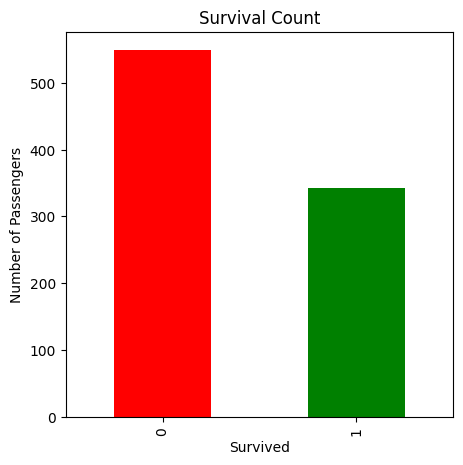

In [28]:
import matplotlib.pyplot as plt

# Overall Survival Count
plt.figure(figsize=(5,5))

train['Survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()


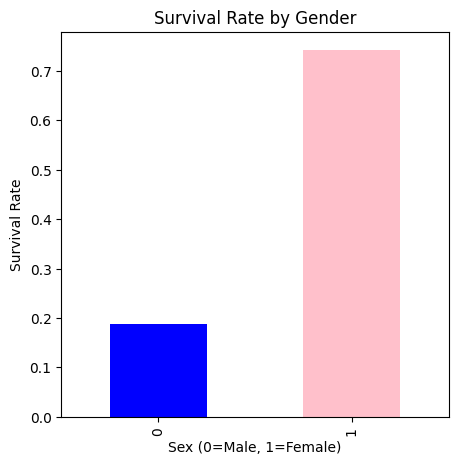

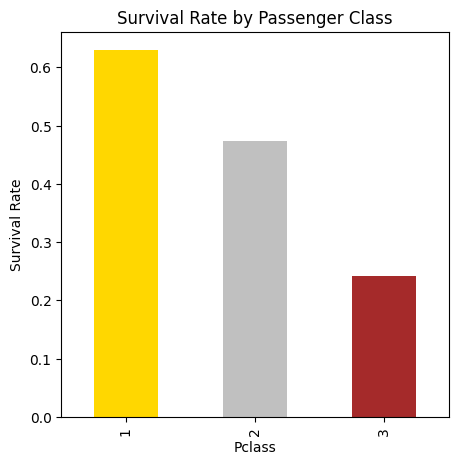

In [29]:
# Survival by Gender
plt.figure(figsize=(5,5))

train.groupby('Sex_num')['Survived'].mean().plot(kind='bar', color=['blue', 'pink'])
plt.title('Survival Rate by Gender')
plt.xlabel('Sex (0=Male, 1=Female)')
plt.ylabel('Survival Rate')
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(5,5))

train.groupby('Pclass')['Survived'].mean().plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()


C:\Users\Lakshay\AppData\Local\Temp\ipykernel_28628\3184071446.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('Age_group')['Survived'].mean().plot(kind='bar', color='purple')


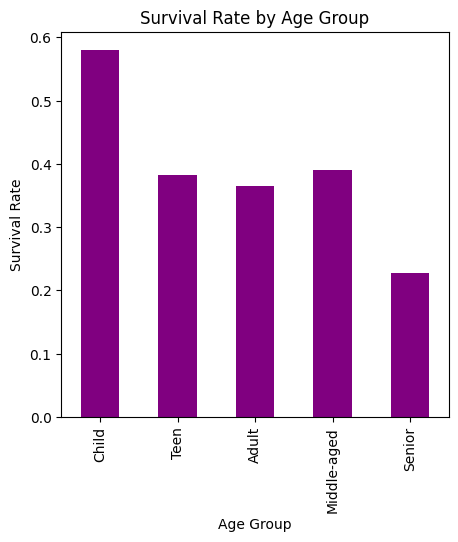

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_28628\3184071446.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('Fare_group')['Survived'].mean().plot(kind='bar', color='orange')


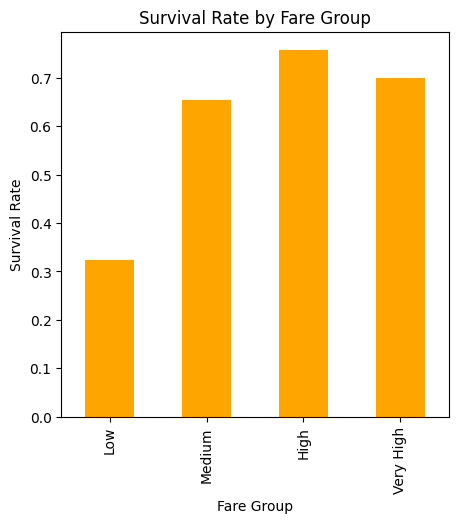

In [30]:
# Survival by Age Group
plt.figure(figsize=(5,5))

train.groupby('Age_group')['Survived'].mean().plot(kind='bar', color='purple')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

# Survival by Fare Group
plt.figure(figsize=(5,5))

train.groupby('Fare_group')['Survived'].mean().plot(kind='bar', color='orange')
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.show()


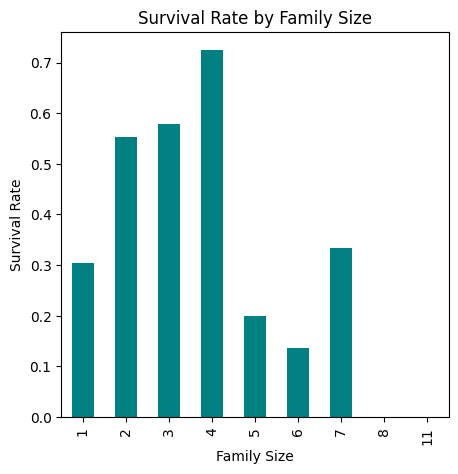

In [31]:
#7. Family Size vs Survival
plt.figure(figsize=(5,5))

train.groupby('Family_size')['Survived'].mean().plot(kind='bar', color='teal')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


# Titanic EDA Summary

## Overall Survival
- Total passengers survived: ~38%
- Total passengers did not survive: ~62%

## Survival by Gender
- Females had much higher survival rates than males.
- Correlation (Sex_num) is ~0.54 → strongest predictor.

## Survival by Passenger Class
- 1st class had the highest survival rate.
- 3rd class had the lowest survival rate.
- Correlation (Pclass) is negative (~-0.34).

## Survival by Age
- Children and young adults survived more than seniors.
- Age has a slight negative correlation with survival (~-0.08).

## Survival by Fare
- Higher fare passengers (usually in 1st class) had higher survival (~0.26 correlation).

## Family Size Influence
- Small families (2–4 people) had better survival.
- Very large families or solo passengers had lower survival.

## Important Features
- Sex_num, Pclass, Fare → most predictive of survival.
- Age, SibSp, Parch → weaker effect but still useful.
